In [57]:
from astropy.table import Table
from astropy.io import fits
import astropy.units as U

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams['font.size'] = 15

In [ ]:
! ls /pscratch/sd/e/edown/outputs/outdir_xirunpc_sv3_maglim_18_bright/rppi/

allcounts_BGS_BRIGHT_N_0.1_0.3_default_log_njack60_nran4_split20.npy
allcounts_BGS_BRIGHT_N_0.1_0.5_default_log_njack60_nran4_split20.npy
allcounts_BGS_BRIGHT_N_0.3_0.5_default_log_njack60_nran4_split20.npy
allcounts_BGS_BRIGHT_NScomb_0.1_0.3_default_log_njack60_nran4_split20.npy
allcounts_BGS_BRIGHT_NScomb_0.1_0.5_default_log_njack60_nran4_split20.npy
allcounts_BGS_BRIGHT_NScomb_0.3_0.5_default_log_njack60_nran4_split20.npy
allcounts_BGS_BRIGHT_S_0.1_0.3_default_log_njack60_nran4_split20.npy
allcounts_BGS_BRIGHT_S_0.1_0.5_default_log_njack60_nran4_split20.npy
allcounts_BGS_BRIGHT_S_0.3_0.5_default_log_njack60_nran4_split20.npy
wp_BGS_BRIGHT_N_0.1_0.3_default_log1_njack60_nran4_split20.txt
wp_BGS_BRIGHT_N_0.1_0.3_default_log2_njack60_nran4_split20.txt
wp_BGS_BRIGHT_N_0.1_0.3_default_log4_njack60_nran4_split20.txt
wp_BGS_BRIGHT_N_0.1_0.5_default_log1_njack60_nran4_split20.txt
wp_BGS_BRIGHT_N_0.1_0.5_default_log2_njack60_nran4_split20.txt
wp_BGS_BRIGHT_N_0.1_0.5_default_log4_njack60_nran

In [14]:
#columns : rpmid | rpavg | pimid | piavg | corr(rp,pi) | std(rp,pi)
#            0       1       2       3         4             5
xirppi_15log21 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_sv3_maglim_18_bright/rppi/xirppi_BGS_BRIGHT_NScomb_0.1_0.5_default_log1_1_njack60_nran4_split20.txt')


xirppi_13log21 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_sv3_maglim_18_bright/rppi/xirppi_BGS_BRIGHT_NScomb_0.1_0.3_default_log1_1_njack60_nran4_split20.txt')


xirppi_35log21 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_sv3_maglim_18_bright/rppi/xirppi_BGS_BRIGHT_NScomb_0.3_0.5_default_log1_1_njack60_nran4_split20.txt')


In [58]:
def plot_contours(data, name): #in a standard format  
    rp_bins = []
    for rp in data[:,0]:
        if not rp in rp_bins:
            rp_bins.append(rp)
    pi_bins = []
    for pi in data[:,2]:
        if not pi in pi_bins:
            pi_bins.append(pi)
            
    corr_reshape = np.transpose(np.reshape(data[:,4],(len(rp_bins), len(pi_bins))))
    print(np.shape(corr_reshape),np.shape(rp_bins),np.shape(pi_bins))
    corr_log_bins = np.logspace(0, np.log10(20), num=20, base=10)
    
    
    plt.figure(figsize=(6,5), dpi=150)
    plt.contour(rp_bins,pi_bins,corr_reshape,levels=corr_log_bins, cmap='viridis')
    #cbar = plt.colorbar()
    #cbar.set_label(' $ xi(r_{p}, \pi)$ ')
    plt.ylim(0,17.5)
    plt.xlim(0.1,7)
    plt.xlabel('$r_{p}$ (h$^{-1}$Mpc)')
    plt.ylabel('$\pi$ (h$^{-1}$Mpc/h)')
    
    
    plt.savefig(f'../../figures/interim/{name}.pdf')
 

(80, 48) (48,) (80,)


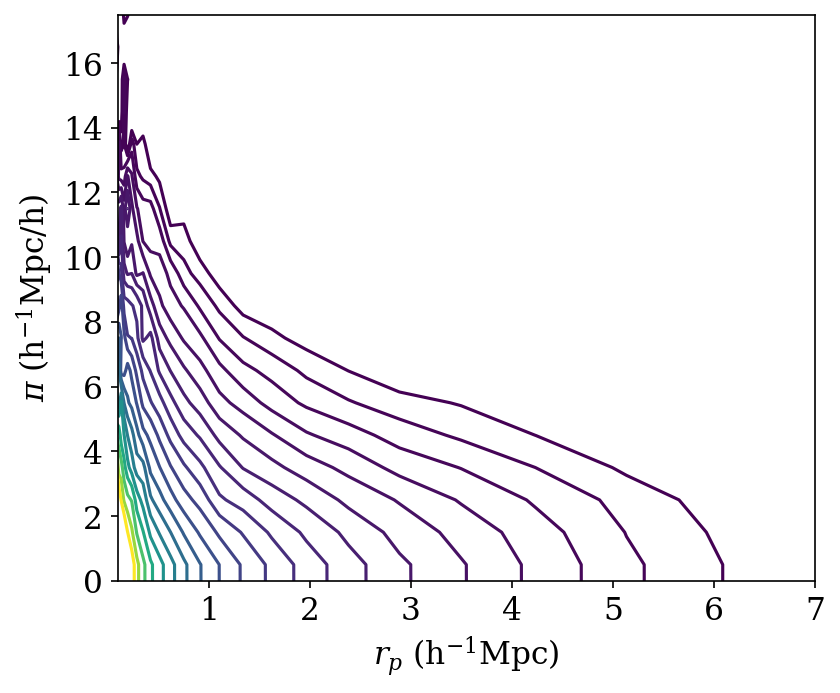

In [60]:
plot_contours(xirppi_15log21, 'sv3_rppi')

(80, 48) (48,) (80,)


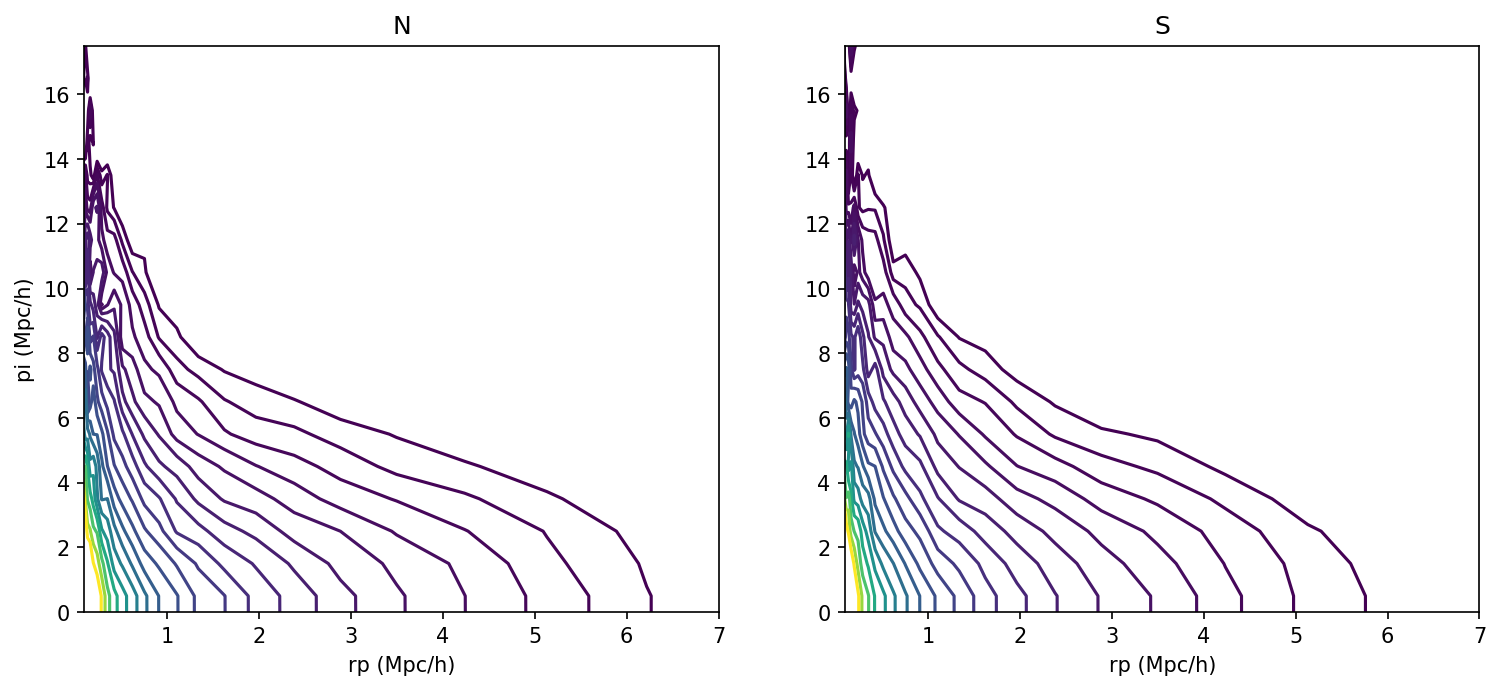

In [11]:
plot_contours(xirppi_13log21_N, xirppi_13log21_S, 'xirppi_13log21')

(80, 48) (48,) (80,)


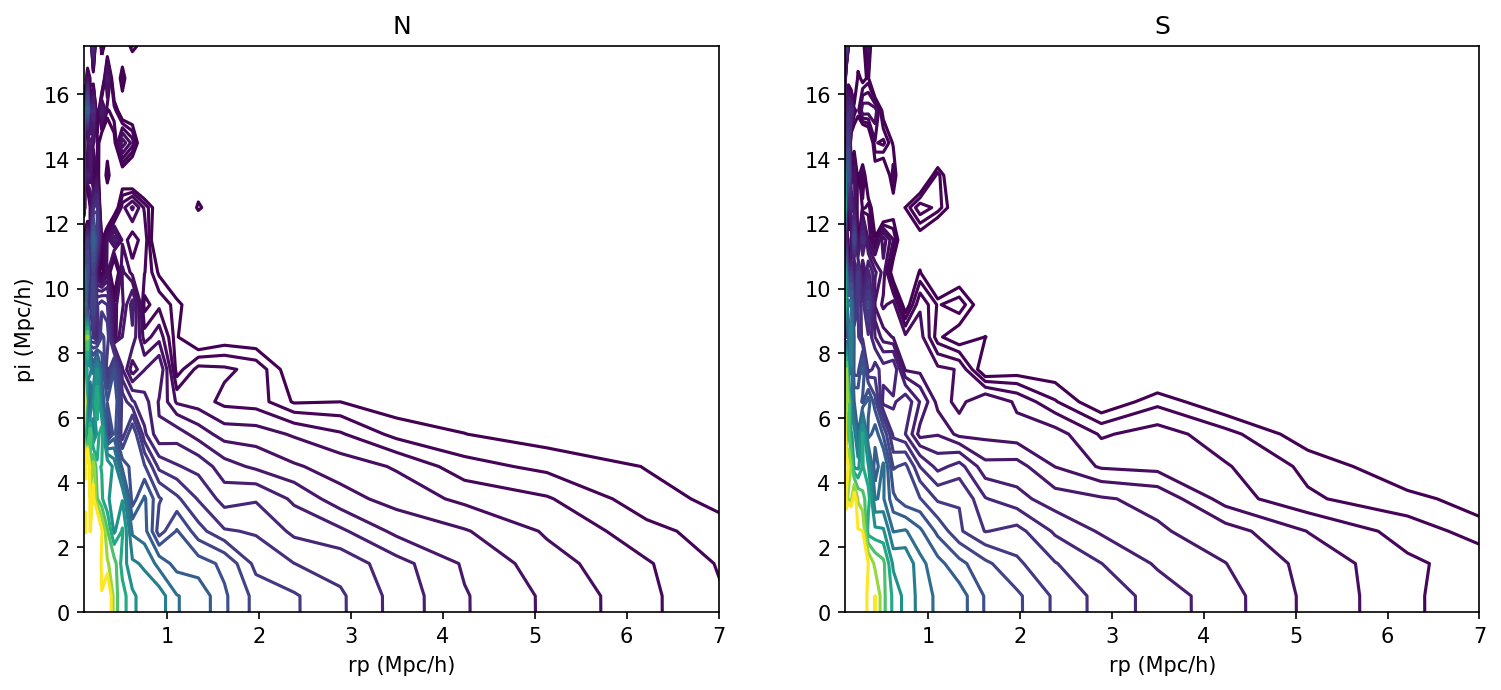

In [12]:
plot_contours(xirppi_35log21_N, xirppi_35log21_S, 'xirppi_35log21')